<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 01 - Titanic
</div>

#### Thành viên 1:
##### * **Họ và tên:** Võ Duy Anh
##### * **MSSV:** 21127221


#### Thành viên 2:
##### * **Họ và tên:** Nguyễn Mậu Gia Bảo
##### * **MSSV:** 21127583


#### Thành viên 3:
##### * **Họ và tên:** Vũ Minh Phát
##### * **MSSV:** 21127739

### **Thư viện hỗ trợ**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### **1. Khám phá dữ liệu**

#### 📌 Đọc dữ liệu từ file

In [2]:
train_df = pd.read_csv('titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 📌 Dữ liệu có bao nhiêu hàng và bao nhiêu cột?

In [3]:
row,col = train_df.shape
print(f'Dữ liệu có {row} hàng và {col} cột')

Dữ liệu có 891 hàng và 12 cột


#### 📌 Ý nghĩa của mỗi hàng là gì?

Mỗi hàng cung cấp thông tin chi tiết về một hành khách cụ thể, bao gồm thông tin như: tuổi, giới tính, số lượng người đi cùng, v.v. và liệu họ có sống sót sau thảm họa đắm tàu Titanic không.

####  📌 Dữ liệu có các dòng bị lặp không?

In [4]:
detectDupSeries = train_df.duplicated(keep='first')
num_duplicated_rows = detectDupSeries.sum()

if num_duplicated_rows == 0:
    print("Dữ liệu không có dòng bị trùng lặp!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} dòng bị trùng lặp.")

Dữ liệu không có dòng bị trùng lặp!


In [5]:
duplicate_ratio = num_duplicated_rows / len(train_df)
print(f"Tỷ lệ trùng lặp của dữ liệu là: {duplicate_ratio:.2%}")

Tỷ lệ trùng lặp của dữ liệu là: 0.00%


#### 📌 Ý nghĩa của mỗi cột là gì?

<table style="width: 100%; border-collapse: collapse;">
  <thead>
    <tr>
      <th style="min-width: 10px; width: 30px; background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">STT</th>
      <th style="background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">Cột</th>
      <th style="background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">Ý nghĩa</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="font-size: 14px; text-align: left;">1</td>
      <td style="font-size: 14px; text-align: left;">PassengerId</td>
      <td style="font-size: 14px; text-align: left;">Mã định danh (ID) cho mỗi hành khách.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">2</td>
      <td style="font-size: 14px; text-align: left;">Survived</td>
      <td style="font-size: 14px; text-align: left;">Chỉ ra liệu hành khách có sống sót sau vụ đắm tàu Titanic hay không (1: sống sót, 0: không sống sót).</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">3</td>
      <td style="font-size: 14px; text-align: left;">Pclass</td>
      <td style="font-size: 14px; text-align: left;">Loại hạng vé của hành khách (1 = Hạng 1, 2 = Hạng 2, 3 = Hạng 3).</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">4</td>
      <td style="font-size: 14px; text-align: left;">Name</td>
      <td style="font-size: 14px; text-align: left;">Tên của hành khách.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">5</td>
      <td style="font-size: 14px; text-align: left;">Sex</td>
      <td style="font-size: 14px; text-align: left;">Giới tính của hành khách.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">6</td>
      <td style="font-size: 14px; text-align: left;">Age</td>
      <td style="font-size: 14px; text-align: left;">Tuổi của hành khách.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">7</td>
      <td style="font-size: 14px; text-align: left;">SibSp</td>
      <td style="font-size: 14px; text-align: left;">Số lượng anh chị em hoặc vợ/chồng đi cùng trên tàu (Siblings/Spouses).</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">8</td>
      <td style="font-size: 14px; text-align: left;">Parch</td>
      <td style="font-size: 14px; text-align: left;">Số lượng cha mẹ hoặc con cái đi cùng trên tàu (Parents/Children).</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">9</td>
      <td style="font-size: 14px; text-align: left;">Ticket</td>
      <td style="font-size: 14px; text-align: left;">Số vé.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">10</td>
      <td style="font-size: 14px; text-align: left;">Fare</td>
      <td style="font-size: 14px; text-align: left;">Giá vé.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">11</td>
      <td style="font-size: 14px; text-align: left;">Cabin</td>
      <td style="font-size: 14px; text-align: left;">Số cabin của hành khách.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">12</td>
      <td style="font-size: 14px; text-align: left;">Embarked</td>
      <td style="font-size: 14px; text-align: left;">Cảng mà hành khách lên tàu (C = Cherbourg, Q = Queenstown, S = Southampton).</td>
    </tr>
  </tbody>
</table>

#### 📌 Kiểu dữ liệu hiện tại của mỗi cột là gì? Có cột nào có kiểu dữ liệu không phù hợp không?

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Cột `PassengerId` là mã định danh cho từng hành khách nên cần chuyển về object để phân vào categorical.
- Cột `Survived` là biến dạng nhị phân để thể hiện trạng thái sống sót hay không, do đó cần chuyển về object để phân vào categorical.
- Cột `Pclass` là cột thể hiện cho loại vé của khách hàng, do đó chuyển về object để phân vào biến định tính có thứ tự.
- Cột `Age` là cột thể hiện cho độ tuổi của khách hàng, cần chuyển về dạng int64.

In [7]:
train_df['PassengerId'] = train_df['PassengerId'].astype('object')
train_df['Survived'] = train_df['Survived'].astype('object')

train_df['Pclass'] = train_df['Pclass'].astype('object')

#### 📌 Đối với mỗi cột có kiểu dữ liệu số, các giá trị được phân bố như thế nào?

📚 Đối với các cột có kiểu dữ liệu số, nhóm sẽ tính toán một số thống kê cơ bản:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- The min
- The lower quartile (phân vị 25)
- The median (phân vị 50)
- The upper quartile (phân vị 75)
- The max


In [8]:
num_col_info_df = train_df.select_dtypes(exclude=['object', 'bool'])

def missing_ratio(s):
    return (s.isna().mean() * 100)

def median(df):
    return (df.quantile(0.5))

def lower_quartile(df):
    return (df.quantile(0.25))

def upper_quartile(df):
    return (df.quantile(0.75))

num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df.T

,missing_ratio,min,lower_quartile,median,upper_quartile,max
Age,19.86532,0.42,20.1250,28.0000,38.0,80.0000
SibSp,0.00000,0.00,0.0000,0.0000,1.0,8.0000
Parch,0.00000,0.00,0.0000,0.0000,0.0,6.0000
Fare,0.00000,0.00,7.9104,14.4542,31.0,512.3292


Nhìn chung, không có điều gì bất thường đối với kiểu dữ liệu dạng số. Cột `Age` đang bị thiếu dữ liệu, do đó nhóm sẽ xử lý dữ liệu thiếu bằng cách điền median của cột và chuyển về kiểu int64 cho phù hợp.

In [9]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

train_df['Age'] = train_df['Age'].astype(int)

In [10]:
# TEST
train_df.select_dtypes(exclude=['object', 'bool'])\
    .agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"]).T

,missing_ratio,min,lower_quartile,median,upper_quartile,max
Age,0.0,0.0,22.0000,28.0000,35.0,80.0000
SibSp,0.0,0.0,0.0000,0.0000,1.0,8.0000
Parch,0.0,0.0,0.0000,0.0000,0.0,6.0000
Fare,0.0,0.0,7.9104,14.4542,31.0,512.3292


#### 📌 Đối với mỗi cột có kiểu dữ liệu không phải là số, các giá trị được phân bố như thế nào?

📚 Đối với các cột có kiểu dữ liệu không phải là số, nhóm sẽ tính toán:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- Số lượng giá trị khác nhau
- Hiển thị một vài giá trị và phần trăm (từ 0 đến 100) của từng giá trị


In [11]:
cat_col_info_df = train_df.select_dtypes(include=['object', 'bool'])

def missing_ratio(s):
    return (s.isna().mean() * 100)

def num_values(s):
    return len(s.value_counts())

def value_ratios(s):
    totalCount = (~s.isna()).sum()
    return ((s.value_counts()/totalCount*100).round(1)).to_dict()

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df.T

,missing_ratio,num_values,value_ratios
PassengerId,0.0,891,"{891: 0.1, 1: 0.1, 2: 0.1, 3: 0.1, 4: 0.1, 5: ..."
Survived,0.0,2,"{0: 61.6, 1: 38.4}"
Pclass,0.0,3,"{3: 55.1, 1: 24.2, 2: 20.7}"
Name,0.0,891,"{'Dooley, Mr. Patrick': 0.1, 'Braund, Mr. Owen..."
Sex,0.0,2,"{'male': 64.8, 'female': 35.2}"
Ticket,0.0,681,"{'1601': 0.8, 'CA. 2343': 0.8, '347082': 0.8, ..."
Cabin,77.104377,147,"{'B96 B98': 2.0, 'G6': 2.0, 'C23 C25 C27': 2.0..."
Embarked,0.224467,3,"{'S': 72.4, 'C': 18.9, 'Q': 8.7}"


Cột `Cabin` có rất nhiều dữ liệu bị thiếu (tối thiểu 77.104377%), nên nhóm tiến hành loại bỏ cột này

In [12]:
train_df.drop(["Cabin"], axis=1, inplace=True)

Cột `Embarked` có một ít dữ liệu bị thiếu, vì vậy nhóm em sẽ thay thế giá trị thiếu bằng giá trị Mode của cột đó

In [13]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [14]:
# TEST
train_df.select_dtypes(include=['object', 'bool'])\
    .agg([missing_ratio, num_values, value_ratios]).T

,missing_ratio,num_values,value_ratios
PassengerId,0.0,891,"{891: 0.1, 1: 0.1, 2: 0.1, 3: 0.1, 4: 0.1, 5: ..."
Survived,0.0,2,"{0: 61.6, 1: 38.4}"
Pclass,0.0,3,"{3: 55.1, 1: 24.2, 2: 20.7}"
Name,0.0,891,"{'Dooley, Mr. Patrick': 0.1, 'Braund, Mr. Owen..."
Sex,0.0,2,"{'male': 64.8, 'female': 35.2}"
Ticket,0.0,681,"{'1601': 0.8, 'CA. 2343': 0.8, '347082': 0.8, ..."
Embarked,0.0,3,"{'S': 72.5, 'C': 18.9, 'Q': 8.6}"


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 76.7+ KB


Lấy 5 dữ liệu ra làm mẫu

In [16]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
417,418,1,2,"Silven, Miss. Lyyli Karoliina",female,18,0,2,250652,13.0000,S
702,703,0,3,"Barbara, Miss. Saiide",female,18,0,1,2691,14.4542,C
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22,1,1,248738,29.0000,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4,4,2,347082,31.2750,S
499,500,0,3,"Svensson, Mr. Olof",male,24,0,0,350035,7.7958,S


### **2. Đặt câu hỏi**

#### 📚 **Câu 1: Loại hạng vé của lớp hành khách nào có tỉ lệ sống sót cao nhất?**

##### - Giúp chúng ta nhận biết mức độ ảnh hưởng của loại hạng vé đối với khả năng sống sót trên tàu Titanic. Liệu có sự ưu tiên trong việc cứu hộ dựa trên tầng lớp xã hội hay không?
##### - Giúp nhận biết mức độ ảnh hưởng của yếu tố xã hội và kinh tế đối với khả năng sống sót trong tình huống khẩn cấp.

#### 📚 **Câu 2: Có sự khác biệt về tỉ lệ sống sót giữa nam và nữ không?**

#####  - Giúp chúng ta nhận biết mức độ ảnh hưởng của giới tính đối với khả năng sống sót trên tàu Titanic. Liệu giới tính có phản ánh yếu tố quyết định trong việc sống sót hay không?
##### - Giúp phát hiện ra liệu có sự ưu tiên giữa nam và nữ trong tình huống khẩn cấp hay không?
##### - Có thể giúp đánh giá khả năng sẵn sàng và phản ứng của hành khách theo giới tính khi đối mặt với tình huống khẩn cấp.

#### 📚 **Câu 3: Tỷ lệ sống sót ở nhóm tuổi nào là cao nhất?**

##### - Giúp chúng ta hiểu rõ hơn về mức độ ảnh hưởng của độ tuổi đối với khả năng sống sót trong tình huống khẩn cấp như trên tàu Titanic. 
##### - Giúp phát hiện ra liệu có sự ưu tiên nào ở các độ tuổi trong việc cứu hộ không?
##### - Có thể giúp đánh giá khả năng sẵn sàng và phản ứng của hành khách khi đối mặt với tình huống khẩn cấp.

#### 📚 **Câu 4: Liệu rằng những người đi cùng gia đình có tỷ lệ sống sót cao hơn những người đi 1 mình?**

##### - Giúp chúng ta hiểu rõ hơn về mức độ ảnh hưởng của việc đi cùng gia đình đối với khả năng sống sót trong tình huống khẩn cấp như trên tàu Titanic. Điều này cung cấp thông tin quan trọng để đánh giá yếu tố hỗ trợ trong quá trình cứu hộ và phản ứng trong các tình huống khẩn cấp.
#### -  Giúp đánh giá tác động của yếu tố gia đình đối với khả năng sống sót. Những người đi cùng gia đình có tỷ lệ sống sót cao hơn, liệu có sự hỗ trợ và quan tâm lẫn nhau trong quá trình cứu hộ hay không?

### **3. Phân tích dữ liệu để trả lời từng câu hỏi**

DataFrame `train_df` sau khi đã thực hiện công việc khám phá, tiền xử lý

In [17]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


#### 📚 **Câu 1: Loại hạng vé của lớp hành khách nào có tỉ lệ sống sót cao nhất?**

##### **Bước 1:** Tính tỷ lệ sống sót trung bình của hành khách theo từng loại hạng vé của hành khách trong tập dữ liệu

Sử dụng groupby để nhóm dữ liệu theo giá trị trong cột `Pclass`, chọn cột `Survived` và tính trung bình. Giá trị trả về là tỷ lệ sống sót trung bình của mỗi nhóm lớp hành khách.

In [18]:
survival_rate_by_class = train_df.groupby('Pclass')['Survived'].mean().reset_index()
survival_rate_by_class['Survived'] *= 100 

`survival_rate_by_class` là một DataFrame chứa thông tin về tỉ lệ sống sót của từng loại hạng vé, với cột `Pclass` chứa thông tin về loại hạng vé của hành khách và cột `Survived` chứa tỷ lệ sống sót của mỗi hạng vé.

In [19]:
survival_rate_by_class

,Pclass,Survived
0,1,62.962963
1,2,47.282609
2,3,24.236253


##### **Bước 2:** Vẽ biểu đồ cột để có cái nhìn trực quan

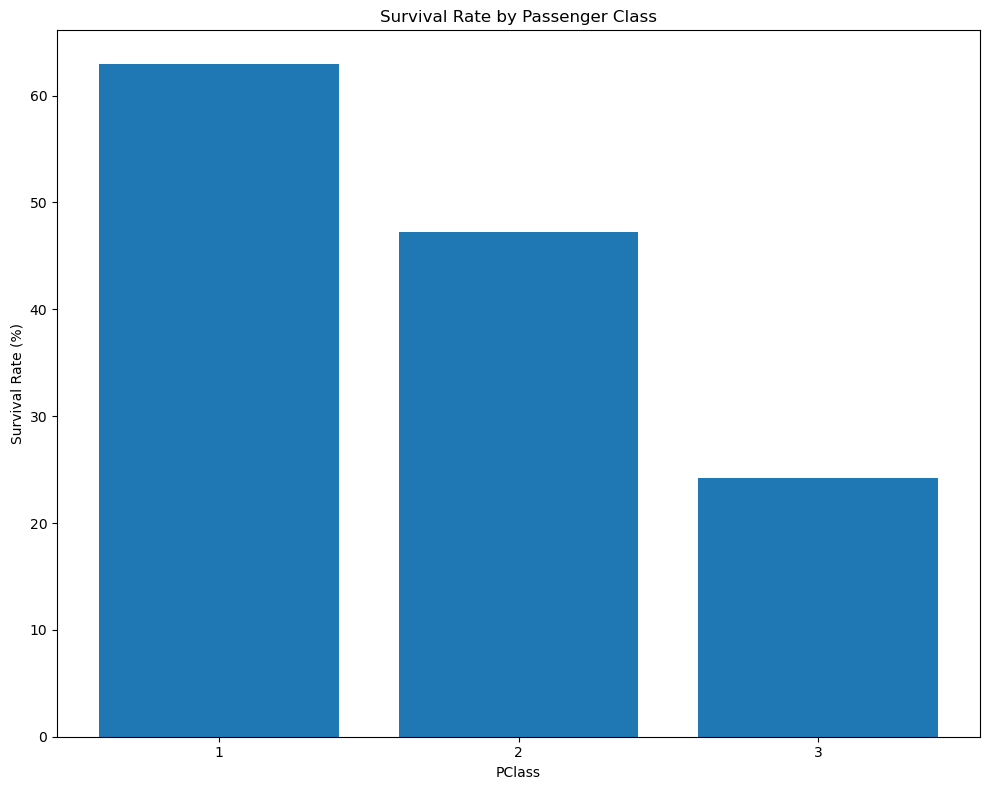

In [20]:
plt.figure(figsize=(10, 8))
plt.bar(survival_rate_by_class['Pclass'], survival_rate_by_class['Survived'])
plt.xlabel('PClass') 
plt.ylabel('Survival Rate (%)')  
plt.title('Survival Rate by Passenger Class')  
plt.xticks(survival_rate_by_class['Pclass'])

# # Save image as svg file to use in report
# plt.tight_layout()
# plt.savefig("./images/survival_rate_by_class.svg", format="svg")

plt.show()

**Nhận xét:**
- Tỷ lệ sống sót giảm dần theo lớp hành khách, với tỷ lệ sống sót trung bình của hành khách ở lớp hạng nhất (Pclass = 1) là cao nhất, với gần khoảng 63%. Điều này cho thấy rằng hành khách ở lớp hạng cao có khả năng sống sót cao hơn so với các lớp hạng thấp hơn. Lớp hạng thấp nhất (Pclass = 3) có tỷ lệ sống sót thấp nhất, chỉ khoảng gần 25%.
- Sự chênh lệch giữa tỷ lệ sống sót của các lớp hành khách là đáng kể. Lớp hành khách ở hạng nhất có tỷ lệ sống sót gấp đôi so với lớp hạng ba. Điều này có thể phản ánh chính sách ưu tiên trong việc cứu hộ, nơi mà hành khách ở lớp cao hơn thường được ưu tiên.
- Lớp hành khách là một yếu tố quan trọng ảnh hưởng đến khả năng sống sót, có thể giải thích điều này bằng việc các hành khách ở lớp cao hơn thường có điều kiện sống sót cao hơn, có khả năng ưu tiên hơn trong việc cứu hộ.

#### 📚 **Câu 2: Có sự khác biệt về tỉ lệ sống sót giữa nam và nữ không?**

##### **Bước 1:** Tính tỷ lệ sống sót trung bình của hành khách theo giới tính của hành khách

Sử dụng groupby để nhóm dữ liệu theo giá trị trong cột `Sex`, chọn cột `Survived` và tính trung bình. Giá trị trả về là tỷ lệ sống sót trung bình theo giới tính của hành khách.

In [21]:
survival_rate_by_sex = train_df.groupby('Sex')['Survived'].mean()

##### **Bước 2:** Vẽ biểu đồ tròn để có cái nhìn trực quan

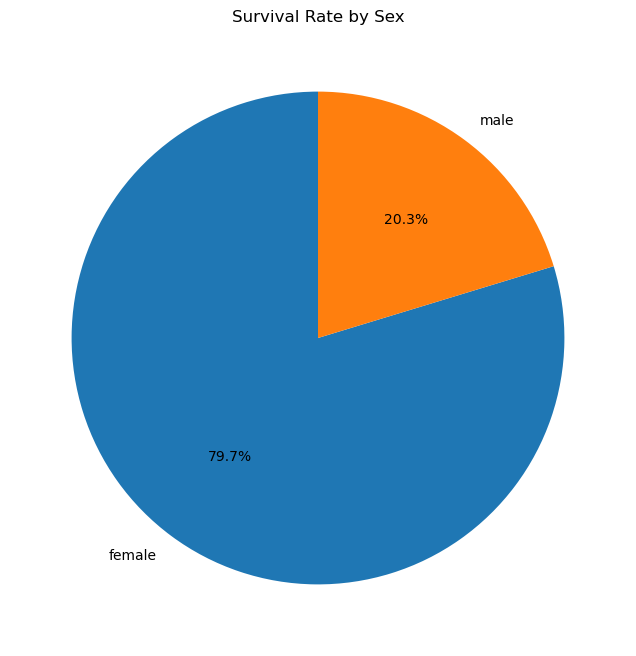

In [42]:
plt.figure(figsize=(10, 8))  
plt.pie(survival_rate_by_sex, labels=survival_rate_by_sex.index, autopct='%1.1f%%', startangle=90)
plt.title('Survival Rate by Sex')

# Save image as svg file to use in report
# plt.tight_layout()
# plt.savefig("./images/survival_rate_by_sex.svg", format="svg")

plt.show()

**Nhận xét:**
- Có sự chênh lệch rõ rệt về tỷ lệ sống sót giữa nam và nữ. Tỷ lệ sống sót trung bình của nữ giới (female) là khoảng 79.7%, trong khi đó tỷ lệ sống sót trung bình của nam giới (male) chỉ là khoảng 20.3%. Sự chênh lệch lớn này phản ánh chính sách ưu tiên cứu hộ của tàu Titanic, trong đó phụ nữ được ưu tiên cứu hộ hơn so với nam giới.
- Giới tính là một yếu tố quan trọng ảnh hưởng đến khả năng sống sót. Kết quả trên đã làm nổi bật vai trò quan trọng của giới tính trong việc ảnh hưởng đến khả năng sống sót trên tàu Titanic. Tỷ lệ sống sót của nữ giới cao hơn đáng kể so với nam giới, có thể do chính sách ưu tiên cứu hộ cho phụ nữ và trẻ em.

#### 📚 **Câu 3: Tỷ lệ sống sót ở nhóm tuổi nào là cao nhất?**

##### **Bước 1:** Phân loại tuổi thành các nhóm: Trẻ em, Người trưởng thành và Cao tuổi

Sử dụng `pd.cut` để chia các giá trị trong cột "Age" thành các khoảng theo độ tuổi trẻ em, người trưởng thành và người cao tuổi. Sau đó tạo cột mới `Age Group` trong dataframe `train_df` để chứa nhóm tuổi tương ứng với mỗi hành khách, dựa trên độ tuổi của họ.

In [43]:
train_df['Age Group'] = pd.cut(train_df['Age'], bins=[0, 18, 60, np.inf], labels=['Trẻ em', 'Người trưởng thành', 'Người cao tuổi'])

##### **Bước 2:** Tính tỷ lệ sống sót trung bình cho mỗi nhóm tuổi

Sử dụng groupby để nhóm dữ liệu theo giá trị trong cột `Age Group`, chọn cột `Survived` và tính trung bình. Giá trị trả về là tỉ lệ sống sót trung bình cho mỗi nhóm tuổi. 

In [44]:
survival_rate_by_age_group = train_df.groupby('Age Group')['Survived'].mean().reset_index()
survival_rate_by_age_group['Survived'] *= 100 

DataFrame `survival_rate_by_age_group` chứa thông tin về tỉ lệ sống sót trung bình của các nhóm tuổi khác nhau. Với cột `Age Group` chứa các nhóm tuổi được phân loại và cột `Survived` chứa tỷ lệ sống sót của mỗi nhóm tuổi.

In [45]:
survival_rate_by_age_group

,Age Group,Survived
0,Trẻ em,47.727273
1,Người trưởng thành,36.575342
2,Người cao tuổi,22.727273


##### **Bước 3:** Trực quan hóa kết quả bằng biểu đồ cột

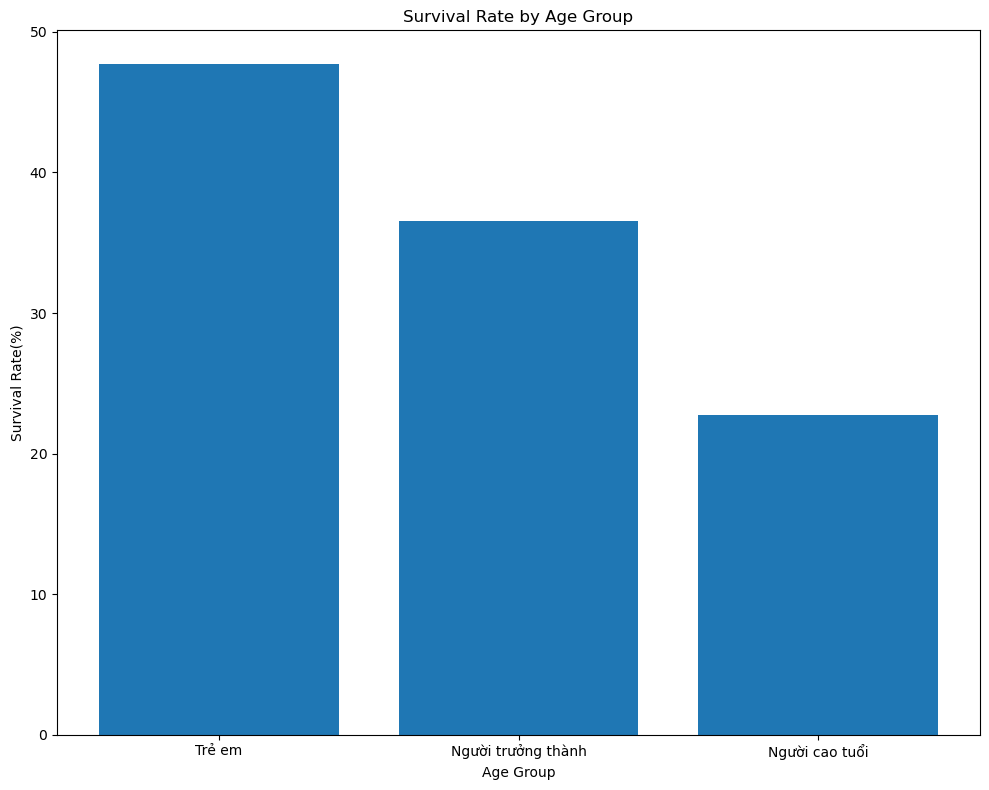

In [46]:
plt.figure(figsize=(10, 8))
plt.bar(survival_rate_by_age_group['Age Group'], survival_rate_by_age_group['Survived'])
plt.xlabel('Age Group')
plt.ylabel('Survival Rate(%)')
plt.title('Survival Rate by Age Group')

# Save image as svg file to use in report
plt.tight_layout()
plt.savefig("./images/survival_rate_by_age_group.svg", format="svg")

plt.show()

**Nhận xét:**
- Tỷ lệ sống sót trung bình của trẻ em (tuổi dưới 18) là khoảng 47.7%, cao hơn đáng kể so với tỷ lệ sống sót của nhóm người trưởng thành và cao tuổi. Điều này có thể được giải thích bằng việc trẻ em thường được ưu tiên cứu hộ và có khả năng di chuyển đến các khu vực an toàn nhanh chóng hơn trong tình huống khẩn cấp.
- Tỷ lệ sống sót trung bình của người trưởng thành (từ 18 đến 60 tuổi) là khoảng 36.6%. Mặc dù tỷ lệ này cao hơn so với nhóm cao tuổi, nhưng vẫn thấp hơn so với nhóm trẻ em. 
- Tỷ lệ sống sót trung bình của nhóm cao tuổi (trên 60 tuổi) chỉ là khoảng 22.7%, thấp nhất trong ba nhóm tuổi. Điều này có thể do họ gặp khó khăn trong việc di chuyển và được cứu hộ trong tình huống khẩn cấp, cũng như có thể có các vấn đề về sức khỏe mà làm giảm khả năng sống sót.
- Dữ liệu này cho thấy  yếu tố tuổi tác cũng ảnh hưởng đến khả năng sống sót trên tàu Titanic. Trẻ em được ưu tiên cứu hộ hơn và có tỷ lệ sống sót cao nhất, trong khi người cao tuổi có tỷ lệ sống sót thấp nhất, với người trưởng thành nằm ở mức trung bình. Điều này phản ánh chính sách ưu tiên cứu hộ và khả năng chịu đựng khác nhau giữa các nhóm tuổi.

#### 📚 **Câu 4: Liệu rằng những người đi cùng gia đình có tỷ lệ sống sót cao hơn những người đi 1 mình?**

##### **Bước 1:** Tính tỷ lệ sống sót trung bình cho từng nhóm SibSp và Parch

Sử dụng groupby để nhóm dữ liệu theo giá trị trong cột `SibSp`, chọn cột `Survived` và tính trung bình. Sử dụng `reset_index` để đổi chỉ số của kết quả trả về để tạo thành DataFrame mới. 

In [47]:
survival_rate_by_SibSp = train_df.groupby('SibSp')['Survived'].mean().reset_index()
survival_rate_by_SibSp['Survived'] *= 100 

`survival_rate_by_SibSp` là một DataFrame chứa thông tin về tỷ lệ sống sót trung bình cho mỗi giá trị của cột `SibSp`.

In [48]:
survival_rate_by_SibSp

,SibSp,Survived
0,0,34.539474
1,1,53.588517
2,2,46.428571
3,3,25.0
4,4,16.666667
5,5,0.0
6,8,0.0


Tương tự cũng sử dụng groupby để nhóm dữ liệu theo giá trị trong cột `Parch`, chọn cột `Survived` và tính trung bình. Sử dụng `reset_index` để đổi chỉ số của kết quả trả về để tạo thành DataFrame mới. 

In [49]:
survival_rate_by_Parch = train_df.groupby('Parch')['Survived'].mean().reset_index()
survival_rate_by_Parch['Survived'] *= 100 

`survival_rate_by_Parch` là một DataFrame chứa thông tin về tỷ lệ sống sót trung bình cho mỗi giá trị của cột `Parch`.

In [50]:
survival_rate_by_Parch

,Parch,Survived
0,0,34.365782
1,1,55.084746
2,2,50.0
3,3,60.0
4,4,0.0
5,5,20.0
6,6,0.0


##### **Bước 2:** Trực quan hóa kết quả bằng biểu đồ cột

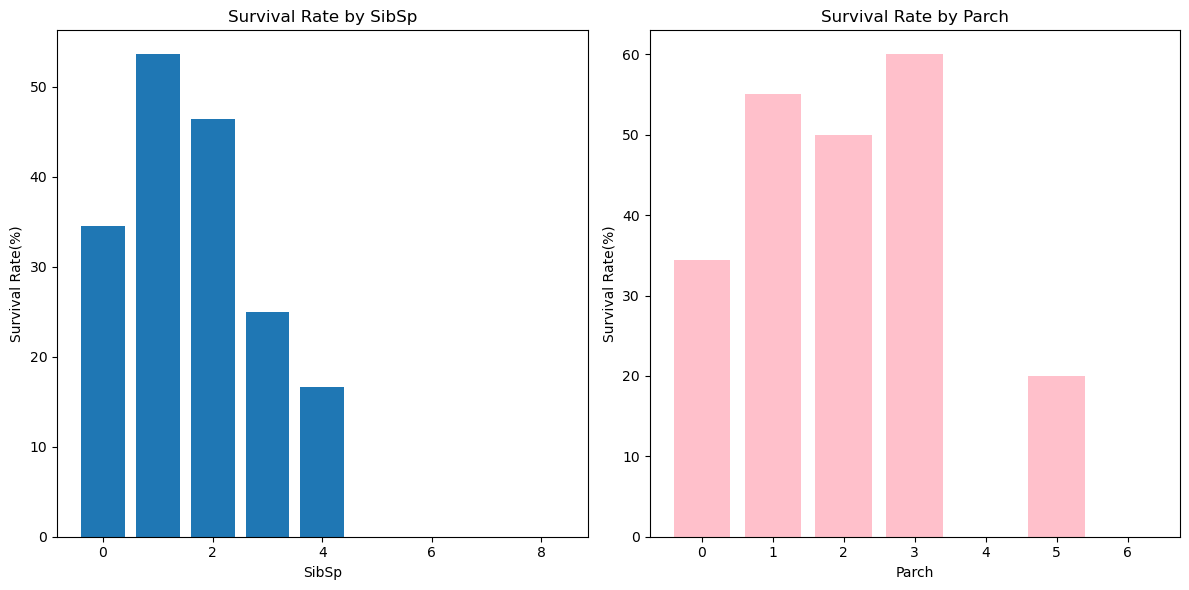

In [31]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(survival_rate_by_SibSp['SibSp'], survival_rate_by_SibSp['Survived'])
plt.xlabel('SibSp')
plt.ylabel('Survival Rate(%)')
plt.title('Survival Rate by SibSp')

plt.subplot(1, 2, 2)
plt.bar(survival_rate_by_Parch['Parch'], survival_rate_by_Parch['Survived'], color='pink')
plt.xlabel('Parch')
plt.ylabel('Survival Rate(%)')
plt.title('Survival Rate by Parch')

plt.tight_layout()
plt.show()

**Nhận xét:**
- Tỷ lệ sống sót trung bình giảm khi có thêm những hành khách cùng tăng lên, có thể do việc đi cùng nhiều người tạo ra khó khăn trong việc di chuyển hoặc tìm đường thoát hiểm trong tình huống khẩn cấp. Điều này có thể làm giảm khả năng sống sót của những người đi cùng nhiều thành viên gia đình.
- Tuy nhiên, nhìn chung, tỷ lệ sống sót thường cao hơn đối với những hành khách đi cùng (có SibSp hoặc Parch khác 0) so với những hành khách đi một mình (SibSp và Parch đều bằng 0).
- Điều này có thể liên quan đến việc hành khách đi cùng có thêm sự hỗ trợ và giúp đỡ trong tình huống khẩn cấp, cũng như có thể chia sẻ và tìm kiếm sự giúp đỡ từ những người thân quen khi đối mặt với tình huống nguy hiểm.